<p style="font-family: Arial; font-size:3.5em;color:purple; font-style:bold"><br>
German Crediting Rating </p><br>

Hello all , I am MVPS Akhil presenting you a new dataset taken from University of California , Irvine to __Predict Whether a credit is good or a bad credit__ 

To give you all a brief about what actually it is 
__Credit Classification__ : It is one of the most popular classification problem encountered by financial institutions. For Example when a customer applies for a loan, financial institutions such as banks would like to predict the probability. 

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Importing Libraries </p><br>

In [5]:
import pandas as pd 
import numpy as np 

In [6]:
german_credit_rating = pd.read_csv('German Credit Data.csv')

In [7]:
german_credit_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In the above dataset we can identify that there are 1000 entries and 14 columns but we will restrict it to only 7 columns and then printing the remaining ones 

In [8]:
german_credit_rating.iloc[0:5,1:7]

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [9]:
german_credit_rating.iloc[0:5,7:]

,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A93,4,67,A143,2,A173,0
1,A92,2,22,A143,1,A173,1
2,A93,3,49,A143,1,A172,0
3,A93,4,45,A143,1,A173,0
4,A93,4,53,A143,2,A173,1


Let us now check the count for good credit and bad credit using function value_counts() on the status column will provide the information. 

In [10]:
german_credit_rating.status.value_counts()

0    700
1    300
Name: status, dtype: int64

The output displays that there are 700 observations for good credit where as 300 observations for bad credit 

In [11]:
X_features = list(german_credit_rating.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Encoding Categorical Features </p><br>

There are several categorical features in the data which needs to be binary encoded also termed as one hot encoding , the function pd.ger_dummies() is used to encode the categorical features by creating dummy variables

In [12]:
encoded_credit_df = pd.get_dummies(german_credit_rating[X_features],drop_first = True)

In [13]:
list(encoded_credit_df)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [14]:
#Displaying the dummy features to verify how they are encoded

In [17]:
encoded_credit_df[['checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14']].head(5)

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [18]:
import statsmodels.api as sm 
Y = german_credit_rating.status
X = sm.add_constant(encoded_credit_df)

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Splitting Dataset into Training and Test Sets </p><br>

Splitting the dataset into 70:30 ratio for creating training and validation datasets. The model will be built using the training set and tested using test set.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Building Logistic Regression Model </p><br>

In [23]:
import statsmodels.api as sm 

logit = sm.Logit(y_train,X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Printing Model Summary </p><br>

In [24]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2021-10-25 21:20  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Model Diagnostics </p><br>

I will be implementing the following measures to use to validate a logistic regression model:
- Wald's test 
- Likelihood ratio test
- Pseudo R Square

In [25]:
def get_significant_vars( lm ) :
    #store the p values and corresponding column names in a dataframe
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    #Filter the column names where p value is less than 0.05
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

Invoking the above method using get_significant_vars() and passing the logit_model we can get the list of significant variables 

In [26]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [27]:
final_logit = sm.Logit( y_train,
              sm.add_constant( X_train [significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [28]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2021-10-25 21:33 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold"><br>
Predicting the Test Data </p><br>

In [29]:
y_pred_df = pd.DataFrame( {"actual" : y_test,
                           "predicted_prob": final_logit.predict(
                           sm.add_constant(X_test[significant_vars]))})

Printing the predictions of few test samples in random using sample method of DataFrame

In [30]:
y_pred_df.sample(10, random_state =42)

,actual,predicted_prob
557,1,0.080493
798,0,0.076653
977,0,0.345979
136,0,0.249919
575,0,0.062264
544,0,0.040768
332,1,0.833093
917,1,0.370667
678,0,0.388392
363,0,0.088952


In [31]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(
                         lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state =42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


<p style="font-family: Arial; font-size:2.5em;color:green; font-style:bold"><br>
Confusion Matrix </p><br>

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline

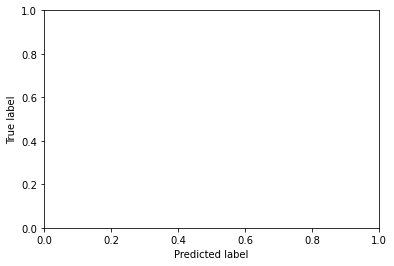

In [34]:
from sklearn import metrics 
def draw_cm( actual, predicted ):
   ##Cret
   cm = metrics.confusion_matrix( actual, predicted, [1,0] )
   sn.heatmap(cm, annot=True, fmt ='.2f', 
              xticklabels = ["Bad Credit", "Good Credit"],
              yticklabels = ["Bad Credit", "Good Credit"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

C:\Users\Akhil\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


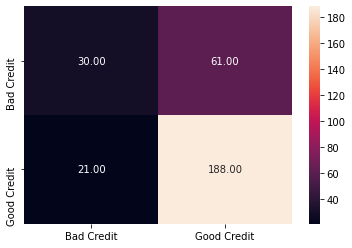

In [35]:
draw_cm( y_pred_df.actual,
         y_pred_df.predicted)